In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
#Prepocessing the dataset using Label Encoding for 2 categorical data
sex_mapping={'male':1,'female':0}
smoker_mapping={'yes':1,'no':0}
dataset['sex']=dataset['sex'].replace(sex_mapping)
dataset['smoker']=dataset['smoker'].replace(smoker_mapping)


C:\Users\huawei\AppData\Local\Temp\ipykernel_30688\199837379.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['sex']=dataset['sex'].replace(sex_mapping)
C:\Users\huawei\AppData\Local\Temp\ipykernel_30688\199837379.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['smoker']=dataset['smoker'].replace(smoker_mapping)


In [4]:
independent=dataset[['age','sex','bmi','children','smoker']]
independent

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [7]:
dependent=dataset[['charges']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='best')
regressor=regressor.fit(x_train,y_train)

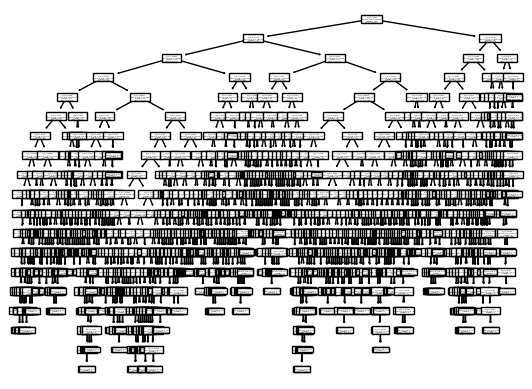

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [36]:
y_pred=regressor.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r_val=r2_score(y_pred,y_test)
r_val

0.7669016784556595